In [1]:
%load_ext autoreload
%autoreload 2

Implementation of Bayesian Personalized Ranking framing the Recommendation Problem as Ranking Optimization

[BPR: Bayesian Personalized Ranking from Implicit Feedback](https://arxiv.org/pdf/1205.2618.pdf)

In [19]:
import matplotlib.pyplot as plt

In [3]:
from recsys_training.data import Dataset
from recsys_training.evaluation import retrieval_score
from recsys_training.model import BPRRecommender

\begin{equation*}
\hat{x}_{uij} = \hat{x}_{ui} - \hat{x}_{uj} \\
x_{ui} = \sum_{f=1}^{d} w_{uf} \cdot h_{if}, i \in I_u^+ \\
x_{uj} = \sum_{f=1}^{d} w_{uf} \cdot h_{jf}, j \in I_u^- \\
\end{equation*}

\begin{equation*}
\text{BPR-Opt} := \sum_{(u,i,j) \in D_S} ln(\hat{x}_{uijj}) - \lambda_{\Theta} \cdot ||\Theta||^2
\end{equation*}

\begin{equation*}
\frac{\partial \text{BPR-Opt}}{\partial \Theta} = \frac{-e^{-\hat{x}_{uij}}}{1+e^{-\hat{x}_{uij}}} \cdot \frac{\partial \hat{x}_{uij}}{\partial \Theta} - \lambda_{\Theta} \cdot \Theta
\end{equation*}

\begin{equation*}
\frac{\partial x_{uij}}{\partial \Theta} =
\begin{cases}
(h_{if}-h_{jf}) & \text{for } \Theta = w_{uf} \\
w_{uf} & \text{for } \Theta = h_{if} \\
-w_{uf} & \text{for } \Theta = h_{jf}
\end{cases}
\end{equation*}

\begin{equation*}
\{W, H\} = \Theta \\
\Theta \sim U[-0.5 \cdot \frac{1}{d}, 0.5 \cdot \frac{1}{d}]
\end{equation*}

(centered around 0 and scaled by number of latent factor components)

In [4]:
k = 16
N = 10
seed = 42

In [5]:
ml100k_filepath = '../data/raw/ml-100k/u.data'
data = Dataset(ml100k_filepath)
data.binarize(min_rating=4.0)
data.rating_split(seed=seed)

In [6]:
recommender = BPRRecommender(data.train_ratings, data.users, data.items,
                             k=k, N=N, seed=seed)

In [7]:
recommender.train(epochs=30, learning_rate=0.05, verbose=True)

Epoch 01: Mean Ranking Loss: 0.6928
Epoch 02: Mean Ranking Loss: 0.6794
Epoch 03: Mean Ranking Loss: 0.4793
Epoch 04: Mean Ranking Loss: 0.3419
Epoch 05: Mean Ranking Loss: 0.3316
Epoch 06: Mean Ranking Loss: 0.2848
Epoch 07: Mean Ranking Loss: 0.2878
Epoch 08: Mean Ranking Loss: 0.2844
Epoch 09: Mean Ranking Loss: 0.2564
Epoch 10: Mean Ranking Loss: 0.2480
Epoch 11: Mean Ranking Loss: 0.2389
Epoch 12: Mean Ranking Loss: 0.2344
Epoch 13: Mean Ranking Loss: 0.1937
Epoch 14: Mean Ranking Loss: 0.1960
Epoch 15: Mean Ranking Loss: 0.1924
Epoch 16: Mean Ranking Loss: 0.1923
Epoch 17: Mean Ranking Loss: 0.1968
Epoch 18: Mean Ranking Loss: 0.1799
Epoch 19: Mean Ranking Loss: 0.1651
Epoch 20: Mean Ranking Loss: 0.1745
Epoch 21: Mean Ranking Loss: 0.1885
Epoch 22: Mean Ranking Loss: 0.1682
Epoch 23: Mean Ranking Loss: 0.1486
Epoch 24: Mean Ranking Loss: 0.1317
Epoch 25: Mean Ranking Loss: 0.1381
Epoch 26: Mean Ranking Loss: 0.1325
Epoch 27: Mean Ranking Loss: 0.1334
Epoch 28: Mean Ranking Loss:

## Evaluation

$MAP@10$ and $MRR@10$ with reciprocal rank of first relevant item in the recommendation list

* train ratings

In [8]:
retrieval_score(data.train_ratings,
                recommender=recommender,
                metric='map')

0.4853503184713376

In [9]:
retrieval_score(data.train_ratings,
                recommender=recommender,
                metric='mrr')

0.057078578868274915

* test ratings (w/o known positive removal)

In [10]:
remove_known_pos = False  # Default

In [11]:
retrieval_score(data.test_ratings,
                recommender=recommender,
                remove_known_pos=remove_known_pos,
                metric='map')

0.09424538545059717

In [12]:
retrieval_score(data.test_ratings,
                recommender=recommender,
                remove_known_pos=remove_known_pos,
                metric='mrr')

0.0472300673518605

* test ratings (w/ known positive removal)

In [13]:
remove_known_pos = True

In [14]:
retrieval_score(data.test_ratings,
                recommender=recommender,
                remove_known_pos=remove_known_pos,
                metric='map')

0.18773072747014116

In [15]:
retrieval_score(data.test_ratings,
                recommender=recommender,
                remove_known_pos=remove_known_pos,
                metric='mrr')

0.08150942530733292

### Evaluation across Epochs

* train w/o known positive removal
* test w/ known positive removal)

In [17]:
model = BPRRecommender(data.train_ratings, data.users, data.items,
                       k=k, N=N, seed=seed)
map_train_trace = []
map_test_trace = []
epochs = 30

for epoch in range(epochs):
    print(f"Training and Evaluation Epoch {epoch+1:02d}")
    model.train(epochs=1, learning_rate=0.05, verbose=False)
    train_map_at_k = retrieval_score(data.train_ratings,
                                     recommender=model,
                                     metric='map')
    test_map_at_k = retrieval_score(data.test_ratings,
                                    recommender=model,
                                    remove_known_pos=True,
                                    metric='map')
    map_test_trace.append(test_map_at_k)
    map_train_trace.append(train_map_at_k)

Training and Evaluation Epoch 01
Training and Evaluation Epoch 02
Training and Evaluation Epoch 03
Training and Evaluation Epoch 04
Training and Evaluation Epoch 05
Training and Evaluation Epoch 06
Training and Evaluation Epoch 07
Training and Evaluation Epoch 08
Training and Evaluation Epoch 09
Training and Evaluation Epoch 10
Training and Evaluation Epoch 11
Training and Evaluation Epoch 12
Training and Evaluation Epoch 13
Training and Evaluation Epoch 14
Training and Evaluation Epoch 15
Training and Evaluation Epoch 16
Training and Evaluation Epoch 17
Training and Evaluation Epoch 18
Training and Evaluation Epoch 19
Training and Evaluation Epoch 20
Training and Evaluation Epoch 21
Training and Evaluation Epoch 22
Training and Evaluation Epoch 23
Training and Evaluation Epoch 24
Training and Evaluation Epoch 25
Training and Evaluation Epoch 26
Training and Evaluation Epoch 27
Training and Evaluation Epoch 28
Training and Evaluation Epoch 29
Training and Evaluation Epoch 30


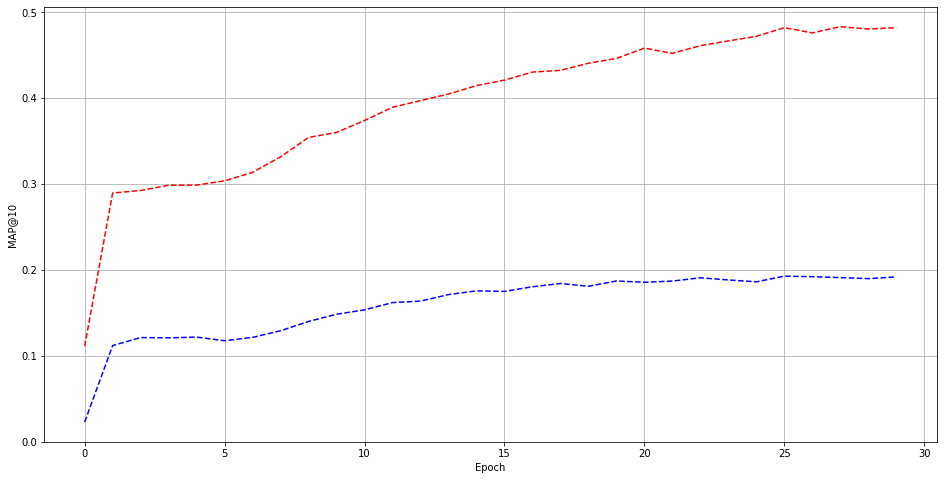

In [21]:
plt.figure(figsize=(16, 8))
plt.plot(range(epochs), map_train_trace, 'r--')
plt.plot(range(epochs), map_test_trace, 'b--')
plt.xlabel('Epoch')
plt.ylabel('MAP@10')
plt.grid(True)
plt.show()